<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Correlation_Calculation_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [38]:
data = pd.read_csv('/content/NSE_INDIAVIX, 1D.csv')

In [39]:
import datetime
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [40]:
data.tail(2)

,time,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA,date
1778,1627616700,12.9450,13.32,12.1750,12.8025,15800.6,15862.8,15744.85,15763.05,NaN,NaN,30-07-2021
1779,1627875900,12.8025,13.09,11.5175,12.8050,15874.9,15892.9,15834.65,15885.15,NaN,NaN,02-08-2021


In [41]:
del data['time']

In [42]:
data= data.set_index('date')

In [43]:
data.tail(5)

,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA
date,,,,,,,,,,
27-07-2021,12.4500,13.5250,12.1025,13.2325,15860.50,15881.55,15701.00,15746.45,NaN,NaN
28-07-2021,13.2325,15.9800,11.3550,13.6925,15761.55,15767.50,15513.45,15709.40,NaN,NaN
29-07-2021,13.6925,13.6925,12.4350,12.9450,15762.70,15817.35,15737.80,15778.45,NaN,NaN
30-07-2021,12.9450,13.3200,12.1750,12.8025,15800.60,15862.80,15744.85,15763.05,NaN,NaN
02-08-2021,12.8025,13.0900,11.5175,12.8050,15874.90,15892.90,15834.65,15885.15,NaN,NaN


In [44]:
data_subset = data[['close','NIFTY, NSE: Close']]

In [45]:
data_subset.tail(2)

,close,"NIFTY, NSE: Close"
date,,
30-07-2021,12.8025,15763.05
02-08-2021,12.8050,15885.15


In [46]:
data_subset.columns=['close_crude','close_nifty']

In [47]:
data_subset['close_percent_crude']=data_subset['close_crude'].pct_change(60)
data_subset['close_percent_nifty']=data_subset['close_nifty'].pct_change(60)

In [48]:
data_subset.dropna(inplace=True)

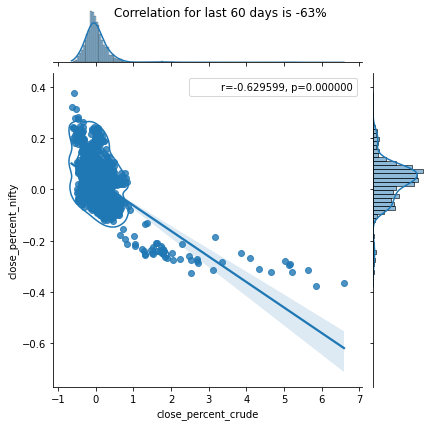

In [49]:
g=sns.jointplot(x='close_percent_crude',y='close_percent_nifty',data=data_subset,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(data_subset['close_percent_crude'], data_subset['close_percent_nifty'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle(f'Correlation for last 60 days is {round(r*100)}%')
plt.show()